In [2]:
import numpy as np
import pandas as pd

file_path = "../../data/raw/yp_competitors_rws_0051_2506.csv"
dataset = pd.read_csv(file_path) 

## Stats for All

In [3]:
dataset.head()

alias  ratingValue dataPublished  \
0  underwater-discoveries-lahaina            5    2013-07-23   
1  underwater-discoveries-lahaina            5    2011-07-01   
2  underwater-discoveries-lahaina            5    2011-06-05   
3  underwater-discoveries-lahaina            5    2011-03-01   
4  underwater-discoveries-lahaina            5    2009-12-03   

                                         description    author  
0  Sitting on the beach is one way to experience ...   Dawn B.  
1  I spent a lot of time on Yelp and Tripadvisor ...   Nora M.  
2  Went on my first snorkeling trip with these gu...  Beryl C.  
3  We are visiting Maui for two weeks - had made ...  Donna K.  
4  If you want to go on a snorkel trip and don't ...  nicky f.

In [4]:
len(dataset)

435017

In [5]:
len(dataset.alias.unique())

2506

In [6]:
dataset.ratingValue.mean()

3.951778895997168

In [7]:
dataset.ratingValue.value_counts()

5    211733
4    103543
3     46880
1     40108
2     32753
Name: ratingValue, dtype: int64

In [8]:
dataset.alias.value_counts()[:10]

mamas-fish-house-paia-9                                         6170
star-noodle-lahaina                                             4965
base-camp-pizza-south-lake-tahoe                                3786
coconuts-fish-cafe-kihei-4                                      3707
monkeypod-kitchen-by-merriman-kihei                             3647
da-kitchen-cafe-kahului                                         3362
slaters-50-50-huntington-beach-huntington-beach                 3242
shin-sen-gumi-hakata-ramen-fountain-valley-fountain-valley-8    3196
aloha-mixed-plate-lahaina                                       3167
the-donuttery-huntington-beach                                  3072
Name: alias, dtype: int64

In [9]:
from nltk import word_tokenize
from nltk import Text
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

# using nltk.Text object
def create_text(reviews):
    result = []
    for review in reviews:
        result.extend(word_tokenize(review))
    return Text(result)

def lexical_diversity(text):
    return len(set(text)) / len(text)

def vocabulary_size(text):
    text.tokens = [x.lower() for x in text.tokens if x.isalpha()]
    vocab = len(set(text))
    return vocab

def content_size(tokens):
    sw_list = stopwords.words('english')
    content = [w for w in tokens if w.lower() not in sw_list]
    return round(len(content) / len(tokens), 5)

In [10]:
reviews = create_text(dataset.description)
reviews

<Text: Sitting on the beach is one way to...>

In [8]:
_text = "".join(dataset.description)

In [12]:
len(word_tokenize(_text))

1900597

In [14]:
len(reviews.tokens)

1924253

In [13]:
len(sent_tokenize(_text))

117031

In [15]:
vocabulary_size(reviews)

20609

In [16]:
lexical_diversity(reviews)

0.012566509389668499

In [17]:
sorted(reviews.vocab().most_common(10), reverse=True)

[('we', 26568),
 ('was', 39260),
 ('to', 33786),
 ('the', 94474),
 ('of', 22990),
 ('it', 26174),
 ('i', 33958),
 ('for', 19429),
 ('and', 60152),
 ('a', 40103)]

In [58]:
maxlen = max(len(word) for word in reviews.tokens)
[word for word in reviews.tokens if len(word) == (maxlen)]

['thecriticalsimoncowellyelper', 'thecriticalsimoncowellyelper']

In [44]:
fd = reviews.vocab()
cumulative = 0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.76% the
  2   9.43% and
  3  11.87% a
  4  14.27% was
  5  16.34% i
  6  18.40% to
  7  20.02% we
  8  21.61% it
  9  23.02% of
 10  24.20% for
 11  25.37% is


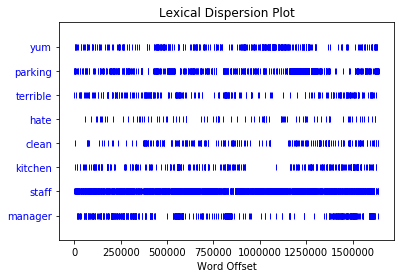

In [30]:
reviews.dispersion_plot(["yum", "parking", "terrible", "hate", "clean", "kitchen", "staff", "manager"])

In [18]:
reviews.vocab().plot(20, cumulative=50)

<Figure size 640x480 with 1 Axes>

In [19]:
reviews.vocab()["common"]

35

In [20]:
content_size(reviews.tokens)

0.51308

In [23]:
some_words_freq = sorted(w for w in set(reviews.vocab()) if reviews.vocab()[w] > 3000 and reviews.vocab()[w] < 4000)
print(some_words_freq)

['about', 'also', 'amazing', 'an', 'by', 'did', 'dinner', 'do', 'go', 'got', 'he', 'lahaina', 'nice', 'or', 'ordered', 'restaurant', 'their', 'up', 'view', 'what', 'when', 'will', 'your']


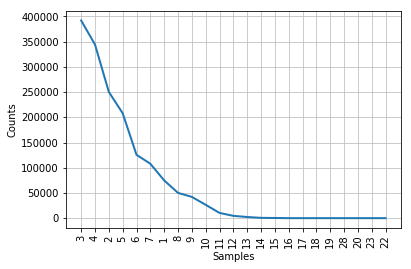

In [24]:
from nltk import FreqDist
word_lengths = FreqDist(len(w) for w in reviews)
word_lengths.plot()

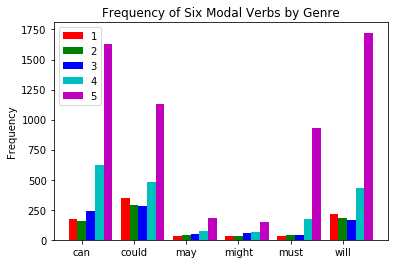

In [92]:
from numpy import arange
from matplotlib import pyplot
import nltk
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Rating')
    pyplot.show()
    
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = ConditionalFreqDist(
    (row.ratingValue, word)
    for i, row in dataset.iterrows()
    for word in word_tokenize(row.description)
    if word in modals
)
counts = {}
for i in range(1, 6):
    counts[i] = [cfdist[i][word] for word in modals]
bar_chart(range(1, 6), modals, counts)

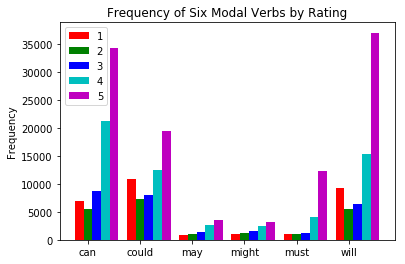

In [12]:
from numpy import arange
from matplotlib import pyplot
import nltk
from nltk import ConditionalFreqDist
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Rating')
    pyplot.show()
    
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = ConditionalFreqDist(
    (row.ratingValue, word)
    for i, row in dataset.iterrows()
    for word in word_tokenize(row.description)
    if word in modals
)
counts = {}
for i in range(1, 6):
    counts[i] = [cfdist[i][word] for word in modals]
bar_chart(range(1, 6), modals, counts)

In [16]:
cfdist.tabulate(samples=modals)

    can could   may might  must  will 
1  7030 10890   877   971  1121  9288 
2  5604  7371  1019  1177  1052  5526 
3  8665  8023  1456  1582  1296  6400 
4 21340 12562  2627  2489  4167 15331 
5 34427 19536  3635  3175 12358 37112 


In [71]:
from nltk import ConditionalFreqDist
import datetime
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset["day"] = dataset.dataPublished.apply(lambda x: x.strftime("%A"))
cfd_days = ConditionalFreqDist(
    (business.alias, business.day) 
    for index, business in dataset.iterrows()
)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
cfd_days.tabulate(samples=days)

                                                                            Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
                                                     1-800-snorkel-kihei         0         0         0         0         0         1         0 
                                                       1054togoshi-kihei        12        18        13        18        25        24        32 
                                       11th-frame-diner-south-lake-tahoe         0         0         1         0         0         0         0 
                        1862-david-walleys-restaurant-and-saloon-genoa-2        21        24        17        16        19        13        30 
                                            1882-bar-and-grill-truckee-2        26        24        30        19        15        28        23 
                                            19-kitchen-and-bar-stateline        43        24        39        35        22        32    

                                         bijou-dog-park-south-lake-tahoe         7         3         5         5         2         3         5 
                            bijou-municipal-golf-course-south-lake-tahoe         1         3         2         2         3         4         1 
                                  bijou-skateboard-park-south-lake-tahoe         1         0         1         0         0         0         0 
                                   bio-bio-expeditions-worldwide-truckee         2         2         0         0         0         2         0 
                                      bistro-at-edgewood-tahoe-stateline        27        20        17        17        12        24        28 
                                                 bistro-casanova-kahului        29        44        36        45        54        56        44 
                                              bistro-elise-crystal-bay-2         4         3         6         8         9         3    

                                         chicos-burgers-south-lake-tahoe         3         3        14         8         7         7        15 
                                       chilangos-mexican-cuisine-lahaina        20        26        23        33        20        24        18 
                                          chilly-peppers-cantina-truckee         0         0         0         0         0         0         1 
                               chimayó-tacos-y-tortas-south-lake-tahoe-2        56        57        64        41        57        76        83 
                                               chimney-beach-carson-city         5         5         8         5         5         5         6 
                                                    china-boat-lahaina-2        40        43        50        46        41        36        45 
                                        china-bowl-asian-cuisine-lahaina        26        30        32        25        19        26    

                                            duo-steak-and-seafood-wailea        79        72        60        65        71        61        79 
                               dwights-beach-concession-huntington-beach         8         8         2         5         5         9         4 
                                             eader-park-huntington-beach         0         0         1         0         0         0         0 
                                  eagle-falls-trailhead-south-lake-tahoe        33        23        21        18        13        19        20 
                                             eagle-lake-south-lake-tahoe         4         3         3         1         3         6         3 
                                         eagle-rock-sunnyside-tahoe-city         4         4         9         6         0         4        10 
                                                   eagles-nest-stateline         2         3         3         6         2         2    

                                       guss-open-pit-bbq-incline-village        14         9         5        13        25        21        22 
                                                      gypsy-maui-makawao         1         2         1         2         5         2         0 
                    gyro-greek-and-mediterranean-gourmet-cuisine-kahului         8         6         5         5         6         7         2 
                                                       gyro-king-kahului         1         0         0         0         0         0         1 
                                  gyu-kaku-japanese-bbq-huntington-beach       307       281       245       193       207       248       233 
                                         h-b-pita-grill-huntington-beach        80        90        98        92       113       102       101 
                                                  h20-sports-zephyr-cove         7         3         2         0         1         0    

                                                      jawz-tacos-kihei-2         7        11         6         3         7         9         4 
                                             jax-at-the-tracks-truckee-2       172       163       131       127       144       215       228 
                                                    jazzys-kitchen-kihei         1         1         1         1         4         1         1 
                                                    jb-s-kitchen-wailuku         9        11        15        12         8        12         4 
                                        jb-sandwiches-huntington-beach-2         7         3         6         3         4         4         0 
                                              jeanne-the-bread-lady-kula         1         2         0         0         2         2         1 
                                    jersey-mikes-subs-huntington-beach-5        18        23        28        20        19        14    

                                           lanzas-restaurant-kings-beach        63        73        51        53        46        62        58 
                                                lapperts-hawaii-wailea-4        36        42        39        48        43        39        39 
                      las-barcas-gourmet-mexican-food-huntington-beach-2        91        80        78        73        83        84        85 
                                               las-panchitas-kings-beach        28        20        31        31        28        42        42 
                                             las-pinatas-of-maui-kahului        36        25        33        38        30        35        49 
                                           lau-hee-chicken-hekka-kahului         2         1         2         0         6         4         2 
                                         launiupoko-beach-park-lahaina-2         1         3         0         1         1         3    

                                                      maui-tacos-kahului         5         6         6        11        11        13        11 
                                               maui-tacos-kahului-maui-2         0         0         1         2         0         1         0 
                                                        maui-tacos-kihei        72        57        60        58        62        52        70 
                                                      maui-tacos-kihei-2         6        10         8        10         5         9        12 
                                             maui-tacos-napili-honokowai        77        61        54        63        71        53        62 
                                                     maui-teriyaki-kihei        27        20        28        36        28        32        29 
                                                  maui-thai-bistro-kihei       114        82       116        85        87        85    

                                         one-fine-blend-huntington-beach         0         1         1         2         0         4         1 
                                                    one-forty-lanai-city         3         9         8         4         2         4         3 
                                          oneloa-beach-west-maui-kapalua         0         0         0         1         0         2         2 
                                                     oneuli-beach-makena         0         0         3         3         2         3         1 
                                                      ono-dogs-maui-maui         2         0         0         0         3         4         4 
                                                    ono-gelato-lahaina-2         4         7         5        11        10         4         6 
                                                     ono-kau-kau-lahaina       107       112       122        95       102        96    

                                                  rivas-south-lake-tahoe         1         0         0         0         0         1         0 
                                                  river-grill-tahoe-city        41        33        27        27        27        26        29 
                                      river-pine-bakery-south-lake-tahoe         1         0         0         0         1         0         0 
                           river-ranch-lodge-and-restaurant-tahoe-city-2        48        39        38        28        27        37        34 
                                                    rm-mini-mart-kahului         0         0         1         0         0         0         0 
                                                  roasted-chiles-kihei-2        53        93        76        77        65        71        58 
                                         roasting-water-huntington-beach        27        24        20        32        21        24    

                                            solstice-eatery-twin-bridges         1         0         0         1         1         1         1 
                                                     sombreros-glenbrook        11         9         5        15         8         9        17 
                                               somersett-local-park-reno         0         0         1         0         0         0         0 
                                       sonic-drive-in-huntington-beach-2        17        13        17        16        12        22        27 
                      sonneys-bbq-shack-bar-and-grill-south-lake-tahoe-2       106        99       111       107       109       146       157 
                                               sonora-taco-truck-lahaina         0         0         0         0         1         0         0 
                                               sonz-steakhouse-lahaina-2        43        41        38        40        34        33    

                                        surfing-monkey-shave-ice-kihei-4         0         5         1         0         2         2         2 
                                         surfside-spirits-and-deli-kihei         8         4         8        10        10        11         5 
                                 surfside-woodfire-pizza-kitchen-lahaina         4         4         9         6         9        13         6 
                                          sushi-on-fire-huntington-beach       263       270       242       249       244       225       282 
                                                    sushi-paradise-kihei        24        29        24        31        26        33        28 
                                            sushi-pier-tahoe-stateline-2       132       126       117        96       101       139       136 
                                              sushi-plus-fountain-valley        58        44        55        50        60        47    

                                              the-ice-bar-olympic-valley         0         0         0         0         1         0         1 
                                      the-ice-cream-way-huntington-beach        29        22        14        18        16        26        20 
                                        the-ice-shack-south-lake-tahoe-2         1         3         2         0         1         2         3 
                                the-ichiban-restaurant-and-sushi-kahului         7         9        10         7        10        11         6 
                                                    the-improv-stateline         5         0         2         4         3         7         4 
                                           the-irishman-huntington-beach        16        13        15        12        24        25        13 
                                                the-java-hut-kings-beach        22        20        13        18        20        20    

                                                 village-green-park-reno         1         0         0         0         0         1         2 
                                              village-pizzeria-truckee-2        55        46        44        31        59        59        58 
                                             village-pub-incline-village         3         3         2         3         2         6         2 
                                 vinnys-pizza-and-pasta-south-lake-tahoe        61        54        60        61        75        93        91 
                                                   vista-park-costa-mesa         0         1         2         1         1         1         1 
                                                 viva-treats-alpine-mdws         1         0         0         1         2         2         2 
                                            volcano-bar-and-grill-wailea         2         1         1         1         4         0    

In [72]:
pd_days = pd.DataFrame.from_dict(cfd_days, orient='index').fillna(0)
pd_days.head()

Tuesday  Friday  Sunday  \
1-800-snorkel-kihei                                   0.0     0.0     0.0   
1054togoshi-kihei                                    18.0    25.0    32.0   
11th-frame-diner-south-lake-tahoe                     0.0     0.0     0.0   
1862-david-walleys-restaurant-and-saloon-genoa-2     24.0    19.0    30.0   
1882-bar-and-grill-truckee-2                         24.0    15.0    23.0   

                                                  Thursday  Saturday  \
1-800-snorkel-kihei                                    0.0       1.0   
1054togoshi-kihei                                     18.0      24.0   
11th-frame-diner-south-lake-tahoe                      0.0       0.0   
1862-david-walleys-restaurant-and-saloon-genoa-2      16.0      13.0   
1882-bar-and-grill-truckee-2                          19.0      28.0   

                                                  Wednesday  Monday  
1-800-snorkel-kihei                                     0.0     0.0  
1054togoshi-kihei                                      13.0    12.0  
11th-frame-diner-south-lake-tahoe                       1.0     0.0  
1862-david-walleys-restaurant-and-saloon-genoa-2       17.0    21.0  
1882-bar-and-grill-truckee-2                           30.0    26.0

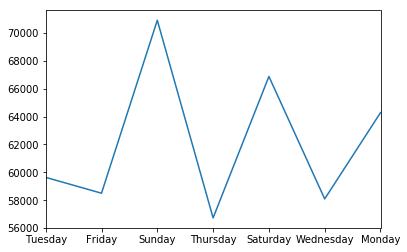

In [79]:
pd_days.sum().plot()

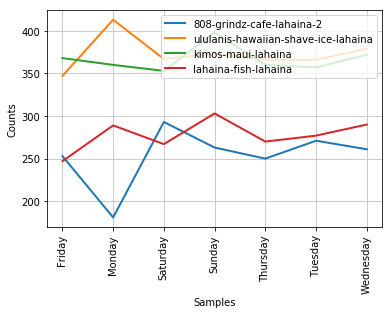

In [116]:
cfd_days.plot(conditions=[
    "808-grindz-cafe-lahaina-2", 
    "ululanis-hawaiian-shave-ice-lahaina", 
    "kimos-maui-lahaina",
    "lahaina-fish-lahaina"]
)

In [28]:
import datetime
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset["mon"] = dataset.dataPublished.apply(lambda x: x.strftime("%b"))
cfd = ConditionalFreqDist(
    (business.alias, business.mon) 
    for index, business in dataset.iterrows()
)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cfd.tabulate(samples=months)

                                                                         Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec 
                                                     1-800-snorkel-kihei   0   0   0   0   0   0   0   0   0   1   0   0 
                                                       1054togoshi-kihei  10   7  13  14  22  19   8  12  12   6   9  10 
                                       11th-frame-diner-south-lake-tahoe   1   0   0   0   0   0   0   0   0   0   0   0 
                        1862-david-walleys-restaurant-and-saloon-genoa-2   7  13  15  13  13   9  11  14  12   9  13  11 
                                            1882-bar-and-grill-truckee-2  22  10  16  10  10  15  24  17  12   6   9  14 
                                            19-kitchen-and-bar-stateline  20  23  16  17  14  21  33  22  18  22  10  11 
                                       19th-hole-restaurant-and-bar-reno   2   0   0   0   0   0   2   0   2   1   0   0 
                        

                        avilas-el-ranchito-mexican-restaurant-costa-mesa  56  44  55  39  43  43  48  48  58  37  29  32 
                                                         awajuice-wailea   1   0   0   0   1   1   0   0   1   0   0   0 
                                    aztecas-mexican-food-fountain-valley  28  16  12  23  14  23  24  18  13  23  14  11 
                                   azul-latin-kitchen-south-lake-tahoe-3 114  83  97  76  77 119 158 174 123  89  90  94 
                            azzaras-italian-restaurant-incline-village-2  14  10  14   7  13  11  21  25  14  14  11  14 
                                              b-candy-huntington-beach-4   0   3   4   1   3   2   3   3   3   3   2   2 
                                          b-nutritious-fountain-valley-2  14  13  16  14   9  11  11   9  22  18  31  17 
                                                   ba-gul-ba-gul-lahaina  11   3   6   2   2   1   2   6   2   3   2   2 
                        

                                  black-bull-chop-house-huntington-beach  29  32  27  34  40  43  47  39  33  41  27  19 
                                     black-cabin-coffee-south-lake-tahoe  24  10   8   6   6   9  14  17   5   7   4  22 
                                                black-rock-beach-lahaina  15  19  14  21  34  23  24  33  27  29  26  17 
                                                   blazin-steaks-wailuku   2   1   1   1   1   0   0   2   2   1   2   1 
                                             blend-café-huntington-beach   1   0   0   0   1   1   1   0   0   0   0   0 
                                  blk-earth-sea-spirits-huntington-beach  64  62  68  67  57  68  90  75  82  81  44  45 
                                      blue-angel-cafe-south-lake-tahoe-6  63  47  54  50  53  48  82  75  65  39  35  53 
                                       blue-coyote-bar-and-grill-truckee  21  10  11   5   6   7  19   8   8   7   6  16 
                        

                                                       candy-dance-genoa   0   0   0   0   0   0   0   0  11   3   0   0 
                                                cane-and-canoe-lahaina-2  19  15  10  11  12   7  22  21  12  10  16  15 
                                            canyon-nine-golf-course-reno   0   0   0   0   0   0   1   0   0   0   1   0 
                                                  canyon-park-costa-mesa   1   0   2   1   1   2   0   0   0   2   1   0 
                                                     capisce-zephyr-cove  38  25  23  20  21  38  38  38  44  21  19  25 
                                               caples-creek-trail-kyburz   0   0   0   0   0   0   0   0   0   0   1   0 
                                 capones-italian-cucina-huntington-beach  57  50  47  43  45  49  57  60  35  41  31  37 
                                               cappys-cafe-newport-beach  70  42  36  46  44  50  54  57  36  38  38  41 
                        

                                                  cones-on-kihei-kihei-2   6   6  10  11   3   4  11   8   8   9   6  14 
                                                  consuelos-kitchen-paia   1   1   1   0   1   0   2   1   0   0   0   0 
                                         cook-kwees-maui-cookies-kahului   1   1   2   0   3   0   1   3   1   0   3   1 
                                      cool-cat-cafe-lahaina-maui-lahaina  80  92  97 100 132 129 162 151 126 133  96 112 
                           coon-street-beach-and-boat-launch-kings-beach   0   1   0   2   1   2   2   3   1   0   0   0 
                                            coppas-maui-bakery-wailuku-2   1   0   0   0   0   0   0   0   0   5   0   0 
                                                copper-lane-cafe-truckee   6   2   1   1   0   1   1   4   0   0   0   5 
                                      corner-bakery-cafe-fountain-valley  23  15  19  20  21  16  18  15  18  29  21  19 
                        

                                        drilld-ice-cream-fountain-valley  39  42  28  22  26  23  22  24  10  14   3   6 
                                           drink-coffee-do-stuff-truckee   0   0   0   0   0   0   0   0   0   0   0   1 
                                                drunken-monkey-truckee-2  54  47  32  46  35  36  52  59  36  23  25  57 
                                           dt-fleming-beach-park-kapalua   5   8   0   5   3   4  12  11   7   7   9   6 
                                               dukes-beach-house-lahaina 112  99 111 120 173 163 190 172 170 176 146 132 
                                        dukes-burgers-huntington-beach-2  20  16   8  16   9  15  20  18  15  10  16  14 
                               dukes-huntington-beach-huntington-beach-2 109 105 126 143 151 118 187 168 134 133 101  86 
                                            duo-steak-and-seafood-wailea  36  25  37  36  41  36  59  46  47  44  47  33 
                        

                                              fresh-coconut-stand-makena   0   2   2   1   1   2   1   1   0   1   0   0 
                                   fresh-gourmet-bagels-huntington-beach  10   4   4   0   2   1   1   3   2   3   3  10 
                                                           fresh-lahaina   0   1   0   0   0   0   3   1   0   1   0   0 
                            freshies-restaurant-and-bar-south-lake-tahoe  68  61  56  47  40  81 111 113  71  36  18  35 
                                      fridas-mexican-beach-house-lahaina  44  59  71  82  73  64 104  84  68  64  58  74 
                       fridays-station-steak-and-seafood-grill-stateline  37  31  31  39  33  28  41  50  35  30  30  44 
                                              friends-of-mokuula-lahaina   0   0   0   1   0   0   0   0   0   0   0   0 
                            frites-gourmet-fries-and-craft-brews-truckee   2   0   1   1   0   1   3   1   2   0   0   0 
                        

                                hawaiian-airlines-premier-lounge-kahului   5   1   1   4   5   3   4   3   0   7   4   3 
                                                 hawaiian-fiesta-wailuku   1   2   1   0   0   0   0   1   2   2   0   4 
         hawaiian-islands-humpback-whale-national-marine-sanctuary-kihei   2   0   0   2   0   0   2   0   0   0   0   0 
                                         hawaiian-village-coffee-lahaina  15  16  22  18  24  24  23  20  27  23  19  18 
                                                   haycraft-park-wailuku   0   1   0   0   1   0   0   0   0   0   2   1 
                                               haz-beanz-coffee-hut-paia   0   1   1   0   0   0   0   0   0   0   0   0 
                                   hb-bagels-and-cafe-huntington-beach-4  13  14  10  12  16   8  11  12  18  10  11  14 
                                              hbstuffed-huntington-beach   0   5   1   1   2   4   3   3   3   0   2   0 
                        

                                                 india-express-lahaina-5  19   9  15   8  35  12  29  20  24  13  21  38 
                             indus-sri-lankan-restaurant-incline-village   0   0   1   1   0   1   2   0   0   0   2   0 
                                          inka-cantina-fountain-valley-3  51  33  50  28  51  38  51  49  46  29  27  31 
                                                 inspiration-point-bijou   0   0   0   0   0   0   1   1   1   2   1   1 
                                                    inu-pool-bar-lahaina   2   0   3   1   2   1   3   2   4   5   4   3 
                                          irassae-sushi-huntington-beach  23  30  21  30  16  28  31  39  27  34  16  24 
                                                 island-cream-co-lahaina  51  35  35  52  68  81  84  67  80  82  69  59 
                                                     island-deli-lahaina   0   0   0   1   1   0   0   0   0   0   0   0 
                        

                                                     kaohu-store-wailuku   1   2   2   2   2   1   3   4   1   4   4   0 
                                               kapa-bar-and-grill-wailea   4   5   3   6   3   5   7   5  11   7   8  11 
                                                        kapalua-bay-maui   7   8   4  10  14  17  21  13  14  17   4  11 
                                                 kapalua-beach-lahaina-2   3   0   3   2   5   3   2   3   3   2   3   4 
                                           kapalua-coastal-trail-lahaina   9   5   5   5   9   6   6  11  11  10   4   5 
                                          kapalua-golf-academy-lahaina-2   0   0   0   1   0   0   0   0   0   0   0   0 
                                                  kapalua-golf-lahaina-2   1   0   0   0   0   0   0   0   0   0   0   1 
                                     kapalua-village-coast-trail-lahaina   0   0   0   0   0   0   0   1   0   2   0   0 
                        

                                       lake-tahoe-pizza-south-lake-tahoe  45  47  28  35  24  47  65  80  32  32  19  39 
                                    lake-tahoe-sauce-co-south-lake-tahoe   0   0   0   1   0   0   1   0   1   1   0   0 
                                           lake-tahoe-south-lake-tahoe-4   0   0   0   0   0   0   0   0   0   0   1   0 
                                           lakelani-poolside-bar-lahaina   0   0   0   0   0   0   0   1   0   0   0   0 
                                              lakeridge-golf-course-reno   1   0   2   4   4   1   4   5   5   5   0   1 
                                             lakeside-bar-and-grill-reno   5   6   4   9   3   7   4   5   3   5   3   3 
                                         lakeside-beach-south-lake-tahoe   0   0   0   0   0   1   3   2   3   2   1   0 
                                          lakeview-cafe-south-lake-tahoe   0   0   0   0   0   0   5   4   0   0   0   0 
                        

                                                 makas-korner-kaunakakai   5   1   1   2   0   3   3   5   1   2   1   3 
                                                makena-golf-course-kihei   2   1   2   0   1   1   2   1   1   0   0   0 
                                                  makena-landing-kihei-2   1   0   1   0   0   1   2   0   0   0   0   0 
                                                makena-state-park-makena   8   6   3   5  11   8   9   4   6   7  13  10 
                                makiali-sushi-and-japanese-pub-truckee-2  21  12  12  11  15   3  25  24  10   5  12  15 
                                               mala-ocean-tavern-lahaina 100  90  94  92 100 121 112 129 112  98  94 100 
                                                  malibu-farm-lanai-city   2   1   2   1   0   0   2   4   1   1   4   2 
                                                     maluaka-beach-kihei   2   2   6   4   3   1   6   3   5   4   5   7 
                        

                                                     mcdonalds-kahului-4   2   0   0   2   2   2   4   2   1   2   0   3 
                                                     mcdonalds-kahului-5   5   5   6   6   5   5   1   2   5   3   5   2 
                                                         mcdonalds-kihei   6   2   5   0   5   1   5   2   4   7   3   2 
                                                     mcdonalds-lahaina-2   9   1   6   3   9   8   6   6   9   3   7   7 
                                                       mcdonalds-makawao   3   2   0   3   0   1   2   0   5   1   1   2 
                                                  mcdonalds-s-lake-tahoe  11   6   2   5   2   5   6   3  12  10   5   7 
                                              mcdonalds-south-lake-tahoe  12  15   6   7   9  14  13  16  10  10  14  17 
                                                       mcdonalds-truckee   7   4   5   5   2   5   6   3   4   4   4   7 
                        

                                  nikkis-indian-cuisine-south-lake-tahoe  51  35  25  25  60  39  42  52  53  22  23  53 
                                                    nikkis-pizza-lahaina  20  13  15  22  18  32  22  29  17  17  14  15 
                               no-1-bbq-and-chinese-restaurant-lahaina-2   5   5   3   4  17  12  12  10  11   7   4   9 
                                      no-1-chinese-food-huntington-beach   1   0   0   2   1   0   1   0   0   1   3   4 
                                      no-ka-oi-grindz-lanai-lanai-city-2   0   7   3   3   1   2   1   0   2   0   4   2 
                                               no-ka-oi-huntington-beach  28  32  38  40  50  51  57  51  41  39  27  31 
                                                       nobu-lanai-city-2   4   1   1   3   2   0   8   4   4   6   5   3 
                                                         nom-eats-reno-2   3   1   2   5   8   5  10   5   3   6   3   3 
                        

                                                 panda-express-kahului-4   6   1   1   2   1   3   3   2   3   6   1   1 
                                                     panda-express-kihei   1   2   1   2   1   2   1   2   2   1   1   4 
                                                   panda-express-lahaina   7   1   4   2   3   4   2   2   2   3   0   1 
                                                   panda-express-truckee   6   3   3   3   7   4   6   3   5   4   6   4 
                                           panera-bread-huntington-beach  20   8  14  11  13  11  10  16  30  14  16  18 
                             papa-joe-pizza-and-pasta-huntington-beach-2   0   1   0   0   0   1   1   0   0   1   1   0 
                                      papa-joes-pizza-huntington-beach-2   0   0   0   0   1   0   0   0   0   0   0   0 
                                       papa-johns-pizza-huntington-beach   9   6   4   4   2   1   3   3   1   6   7   3 
                        

                                                    rainbow-park-makawao   0   0   0   0   1   0   0   0   0   0   0   0 
                                                 rainbow-ridge-park-reno   0   0   2   0   1   0   2   0   1   0   0   0 
                                       ramain39-izakaya-huntington-beach  35  13  44  76  60  46  43  44  45  37  33  25 
                                                        ramen-ya-kahului  22  16   6   9  16   8  20  22  13  21   9  23 
                                    raw-bar-by-slapfish-huntington-beach   1   5  14  10  12  12  16  10   5   6   7   6 
                                                            rays-wailuku   0   0   1   0   0   1   0   0   0   1   0   0 
                                                rc-cafe-huntington-beach   1   1   0   0   0   0   2   1   0   0   0   1 
                                     recency-club-lounge-incline-village   0   0   0   0   0   0   0   0   0   0   1   0 
                        

                                  shipley-nature-center-huntington-beach   2   5   2   3   5   6   2   1   4   2   2   0 
                                                    shipwreck-beach-maui   0   0   1   0   0   0   1   0   1   0   0   0 
                               shirley-lake-falls-trail-south-lake-tahoe   0   0   0   1   0   0   0   0   0   0   0   0 
                                         shirley-lake-trail-squaw-valley   0   0   0   1   5   5  14   7   4   3   1   0 
                                     shirley-lake-trailhead-squaw-valley   0   0   0   0   3   0   2   0   0   1   0   0 
                                             shooters-huntington-beach-4   4   0   5   2   3   3   1   3   5   3   3   2 
                                               shorebreak-grindz-kahului   0   0   2   0   0   0   0   1   1   1   0   1 
                                                    siam-cuisine-truckee  22   8   8   7   5  11  13  10   8   7  11  20 
                        

                                                       starbucks-reno-17   2   4   3   2   4   1   2   6   1   1   0   1 
                                                       starbucks-reno-28   4   1   2   3   3   3   2   1   3   1   3   6 
                                                       starbucks-reno-32   1   0   1   2   0   2   0   1   0   1   0   2 
                                                       starbucks-reno-42   1   1   1   1   3   4   3  11   2   4   6   4 
                                              starbucks-south-lake-tahoe  26  12   9   8  19  15  22  29  13  14   6  13 
                                            starbucks-south-lake-tahoe-2   2   0   1   1   3   1   2   3   0   2   1   2 
                                            starbucks-south-lake-tahoe-3  10   2   8   2   4   6  15   9   9   5   3  12 
                                            starbucks-south-lake-tahoe-4  12   9   8   5   4   2  11  10   8   6   6  14 
                        

                                   taco-cantina-and-restaurant-stateline   8   0   0   0   0   0   0   0   0   0   0   0 
                                                       taco-gardnerville   1   0   0   0   0   0   0   0   0   0   0   1 
                                                    taco-style-wailuku-2   1   0   0   1   0   4   3   1   0   1   2   2 
                                        taco-taqueria-south-lake-tahoe-2   8   7   2   7   7   8  10   7  15   7   4   8 
                                         tacos-el-rancho-fountain-valley  10  13  11   9   5  10   8   8  11  14   9   6 
                                                    tacos-el-rapido-reno   1   0   0   0   0   1   0   0   0   0   0   0 
                                tacos-el-rey-food-truck-huntington-beach   1   0   0   0   0   2   0   0   2   0   1   0 
                                             tacos-jalisco-kings-beach-2   4   5   0   2   5   5  14  13   3   5   3   5 
                        

                               the-cure-kitchen-and-bar-huntington-beach  15  13  16   7   6  13  22  39  23  19  14  22 
                                                 the-dam-cafe-tahoe-city  19  18  12   8   8  22  33  29  16  20  14  17 
                                    the-dining-room-at-sugar-bowl-norden   3   1   3   0   1   1   0   0   1   0   0   2 
                                          the-donuttery-huntington-beach 274 225 253 268 252 270 292 297 266 260 212 203 
                                                         the-dumps-kihei   0   0   0   0   1   0   1   0   1   0   0   0 
                              the-dunes-at-maui-lani-golf-course-kahului   9   1   2   8   5   2   5   5   4   6   3   2 
                                               the-feast-at-lele-lahaina  60  46  63  65  80  82 106  82  73  94  49  53 
                                            the-fish-market-maui-lahaina 178 122 142 152 204 194 220 231 223 227 205 178 
                        

                                       toiyabe-golf-club-washoe-valley-2   0   1   2   1   4   3   1   6   2   2   1   1 
                                                       tokyo-tei-wailuku   5   7  10  10   6   5  13   9  15  13  12   8 
                          tommy-bahama-restaurant-bar-store-wailea-kihei  72  56  57  70  67  72  93  84  61  77  70  75 
                                                        tots-treats-reno   0   2   0   0   0   0   0   0   0   0   0   0 
                                                    tourist-club-truckee   7   5   3   3   0   5   2   3   6   3   2   5 
                                      tower-15-pizzeria-huntington-beach   1   3   2   2   2   4   3   3   0   3   0   3 
                                      tradewinds-mart-and-deli-wailuku-3   2   1   0   1   3   3   1   7   0   2   4   0 
                                               trails-and-vistas-truckee   0   0   0   0   0   0   0   0   2   0   0   0 
                        

                                                     where-we-met-tahoma   1   1   0   0   2  10  11  10   5   5   0   0 
                                        whiskey-dicks-south-lake-tahoe-2  16  10  11   5   6   6   9   7   9   4   4  11 
                                             whispering-vine-wine-reno-2   6   6   8   8   3   4   6   3  11  21  15   7 
                                             whitecaps-pizza-kings-beach   7   6   5   4   4  12  36  41  23  10   6   7 
                                      wienerschnitzel-huntington-beach-2   4   4   5   1   2   2   3   1   1   2   2   1 
                                      wienerschnitzel-huntington-beach-4   2   1   2   1   1   2   8   3   2   0   2   1 
                                      wild-cherries-coffee-house-truckee  44  25  22  19  18  22  28  39  22  23  20  21 
                                                  wild-wahine-maui-kihei   7   8   8   5   3   7   2  11   2   8   8   6 
                        

In [69]:
pd_months = pd.DataFrame.from_dict(cfd, orient='index').fillna(0)
pd_months.head()

Jul   Jun   Mar   Dec  \
1-800-snorkel-kihei                                0.0   0.0   0.0   0.0   
1054togoshi-kihei                                  8.0  19.0  13.0  10.0   
11th-frame-diner-south-lake-tahoe                  0.0   0.0   0.0   0.0   
1862-david-walleys-restaurant-and-saloon-genoa-2  11.0   9.0  15.0  11.0   
1882-bar-and-grill-truckee-2                      24.0  15.0  16.0  14.0   

                                                   Nov   Sep   Aug   May  \
1-800-snorkel-kihei                                0.0   0.0   0.0   0.0   
1054togoshi-kihei                                  9.0  12.0  12.0  22.0   
11th-frame-diner-south-lake-tahoe                  0.0   0.0   0.0   0.0   
1862-david-walleys-restaurant-and-saloon-genoa-2  13.0  12.0  14.0  13.0   
1882-bar-and-grill-truckee-2                       9.0  12.0  17.0  10.0   

                                                   Apr   Jan  Oct   Feb  
1-800-snorkel-kihei                                0.0   0.0  1.0   0.0  
1054togoshi-kihei                                 14.0  10.0  6.0   7.0  
11th-frame-diner-south-lake-tahoe                  0.0   1.0  0.0   0.0  
1862-david-walleys-restaurant-and-saloon-genoa-2  13.0   7.0  9.0  13.0  
1882-bar-and-grill-truckee-2                      10.0  22.0  6.0  10.0

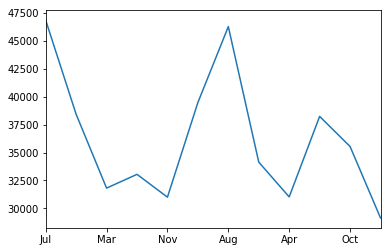

In [70]:
pd_months.sum().plot()

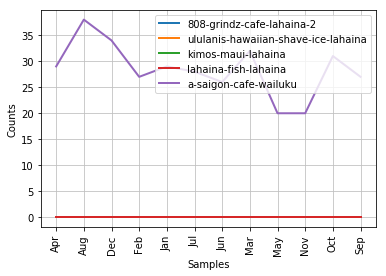

In [60]:
cfd.plot(conditions=[
    "808-grindz-cafe-lahaina-2", 
    "ululanis-hawaiian-shave-ice-lahaina", 
    "kimos-maui-lahaina",
    "lahaina-fish-lahaina",
    "a-saigon-cafe-wailuku"
]
)

## Stats for Individual Records

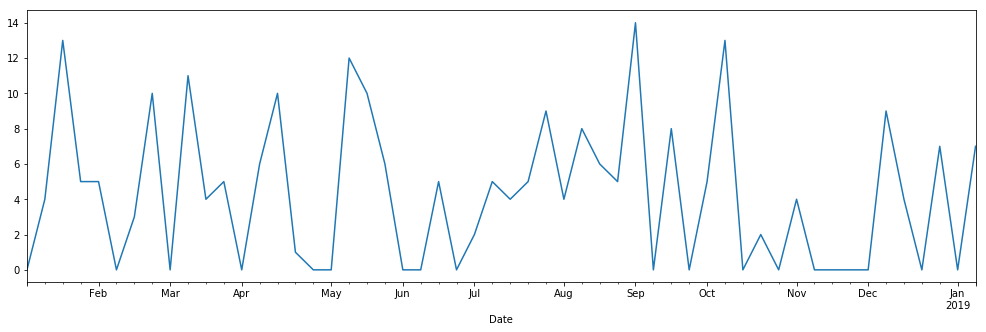

In [63]:
import datetime
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset['Date'] = pd.to_datetime(dataset['dataPublished']) - pd.to_timedelta(5, unit='d')
a = dataset.loc[dataset.alias == 'a-saigon-cafe-wailuku'].groupby([pd.Grouper(key="Date", freq="W-MON")])['ratingValue'].sum()
# a.plot('line', figsize=(15, 10))
a[a.index > datetime.datetime(2018, 1, 1)].plot('line', figsize=(17, 5))

In [86]:
pd.to_timedelta(5, unit='D')

Timedelta('5 days 00:00:00')

In [87]:
dataset['Date'] = pd.to_datetime(dataset['dataPublished']) - pd.to_timedelta(5, unit='d')
# dataset.groupby([pd.Grouper(key="Date", freq="W-MON")])['ratingValue'].sum()
dataset

alias  ratingValue dataPublished  \
0                  underwater-discoveries-lahaina            5    2013-07-23   
1                  underwater-discoveries-lahaina            5    2011-07-01   
2                  underwater-discoveries-lahaina            5    2011-06-05   
3                  underwater-discoveries-lahaina            5    2011-03-01   
4                  underwater-discoveries-lahaina            5    2009-12-03   
5       no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-12-07   
6       no-1-bbq-and-chinese-restaurant-lahaina-2            3    2018-12-06   
7       no-1-bbq-and-chinese-restaurant-lahaina-2            3    2018-11-01   
8       no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-09-09   
9       no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-08-04   
10      no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-08-03   
11      no-1-bbq-and-chinese-restaurant-lahaina-2            2    2018-07-11   
12      no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-06-14   
13      no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-06-13   
14      no-1-bbq-and-chinese-restaurant-lahaina-2            2    2018-06-08   
15      no-1-bbq-and-chinese-restaurant-lahaina-2            2    2018-05-23   
16      no-1-bbq-and-chinese-restaurant-lahaina-2            3    2018-05-19   
17      no-1-bbq-and-chinese-restaurant-lahaina-2            3    2018-05-06   
18      no-1-bbq-and-chinese-restaurant-lahaina-2            4    2018-04-08   
19      no-1-bbq-and-chinese-restaurant-lahaina-2            5    2018-03-14   
20      no-1-bbq-and-chinese-restaurant-lahaina-2            5    2018-01-27   
21      no-1-bbq-and-chinese-restaurant-lahaina-2            1    2017-12-26   
22      no-1-bbq-and-chinese-restaurant-lahaina-2            5    2017-11-12   
23      no-1-bbq-and-chinese-restaurant-lahaina-2            5    2017-10-18   
24      no-1-bbq-and-chinese-restaurant-lahaina-2            3    2017-09-30   
25      no-1-bbq-and-chinese-restaurant-lahaina-2            3    2017-09-16   
26      no-1-bbq-and-chinese-restaurant-lahaina-2            4    2017-09-06   
27      no-1-bbq-and-chinese-restaurant-lahaina-2            4    2017-08-25   
28      no-1-bbq-and-chinese-restaurant-lahaina-2            5    2017-08-09   
29      no-1-bbq-and-chinese-restaurant-lahaina-2            3    2017-07-27   
...                                           ...          ...           ...   
434987             vegan-nirvana-huntington-beach            5    2015-06-20   
434988             vegan-nirvana-huntington-beach            5    2015-06-20   
434989             vegan-nirvana-huntington-beach            4    2015-06-19   
434990             vegan-nirvana-huntington-beach            5    2015-06-19   
434991             vegan-nirvana-huntington-beach            5    2015-06-18   
434992             vegan-nirvana-huntington-beach            5    2015-06-17   
434993             vegan-nirvana-huntington-beach            5    2015-06-16   
434994             vegan-nirvana-huntington-beach            4    2015-06-14   
434995             vegan-nirvana-huntington-beach            5    2015-06-14   
434996             vegan-nirvana-huntington-beach            5    2015-06-13   
434997             vegan-nirvana-huntington-beach            5    2015-06-12   
434998             vegan-nirvana-huntington-beach            5    2015-06-11   
434999             vegan-nirvana-huntington-beach            5    2015-06-10   
435000             vegan-nirvana-huntington-beach            5    2015-06-08   
435001             vegan-nirvana-huntington-beach            4    2015-06-08   
435002             vegan-nirvana-huntington-beach            5    2015-06-07   
435003             vegan-nirvana-huntington-beach            5    2015-06-06   
435004             vegan-nirvana-huntington-beach            5    2015-06-03   
435005             vegan-nirvana-huntington-

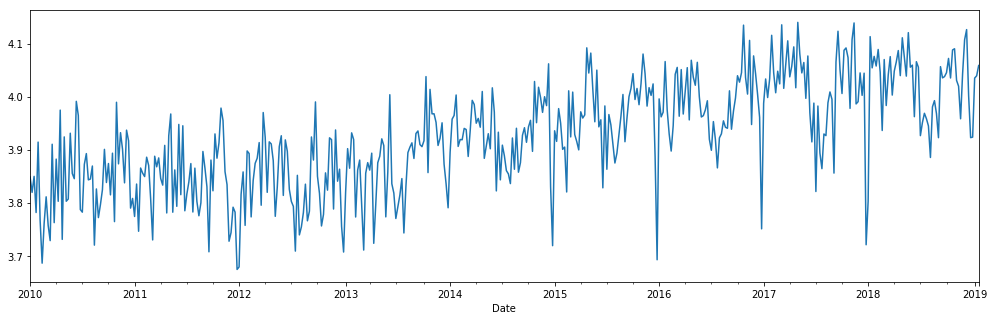

In [68]:
import datetime
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset['Date'] = pd.to_datetime(dataset['dataPublished']) - pd.to_timedelta(5, unit='d')
a = dataset.groupby([pd.Grouper(key="Date", freq="W-MON")])['ratingValue'].mean()
# a.plot('line', figsize=(15, 10))
a[a.index > datetime.datetime(2010, 1, 1)].plot('line', figsize=(17, 5))

In [89]:
a = dataset.Date.apply(lambda t: t.to_period(freq='M'))

In [90]:
a.head()

0    2013-07
1    2011-06
2    2011-05
3    2011-02
4    2009-11
Name: Date, dtype: period[M]

In [36]:
businesses = set(dataset.alias)
results = []
for business in businesses:
    data = dataset.loc[dataset.alias == business]
    _concataneted = "".join(data.description)
    text = create_text(data.description)
    word_len = len(word_tokenize(_concataneted))
    sent_len = len(sent_tokenize(_concataneted))
    results.append({
        "rating_cnt": len(data),
        "rating_avg": data.ratingValue.mean(),
        "rating_sum": data.ratingValue.sum(),
        "lexical_diversity": lexical_diversity(text),
        "tokens_size": len(text),
        "vocabulary_size": vocabulary_size(text),
        "words_in_sent_avg": word_len / sent_len,
        "word_tokenize": word_len,
        "sent_tokenize": sent_len,
        "content_size": content_size(text.tokens)
    })

In [37]:
pd.DataFrame(results, index=businesses).sort_values("tokens_size", ascending=False).head()

content_size  lexical_diversity  \
kimos-maui-lahaina                        0.51152           0.039341   
lahaina-grill-lahaina                     0.51006           0.043691   
ululanis-hawaiian-shave-ice-lahaina       0.51994           0.037418   
lahaina-fish-lahaina                      0.51960           0.049239   
808-grindz-cafe-lahaina-2                 0.51225           0.043341   

                                     rating_avg  rating_cnt  rating_sum  \
kimos-maui-lahaina                     4.027648        2568       10343   
lahaina-grill-lahaina                  4.546883        1845        8389   
ululanis-hawaiian-shave-ice-lahaina    4.790885        2611       12509   
lahaina-fish-lahaina                   3.985589        1943        7744   
808-grindz-cafe-lahaina-2              4.537810        1772        8041   

                                     sent_tokenize  tokens_size  \
kimos-maui-lahaina                           16306       268705   
lahaina-grill-lahaina                        14713       247806   
ululanis-hawaiian-shave-ice-lahaina          14625       244430   
lahaina-fish-lahaina                         10670       169094   
808-grindz-cafe-lahaina-2                    10702       168246   

                                     vocabulary_size  word_tokenize  \
kimos-maui-lahaina                              7473         265309   
lahaina-grill-lahaina                           7748         245498   
ululanis-hawaiian-shave-ice-lahaina             6450         241616   
lahaina-fish-lahaina                            6046         166645   
808-grindz-cafe-lahaina-2                       5055         166168   

                                     words_in_sent_avg  
kimos-maui-lahaina                           16.270637  
lahaina-grill-lahaina                        16.685788  
ululanis-hawaiian-shave-ice-lahaina          16.520752  
lahaina-fish-lahaina                         15.618088  
808-grindz-cafe-lahaina-2                    15.526817

In [ ]:
"sdfa".isalpha()

In [ ]:
len(reviews)

In [ ]:
len(reviews.tokens)